In [7]:
! pip3 install scikit-learn
#! pip3 install matplotlib
#! pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 3.5 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 57.9 MB/s eta 0:00:00 MB/s eta 0:00:0101
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 53.3 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV #ML, train_test_split pega o conjunto de dados de divide em 2 grupos, um train e um test / #GridSearchCV procura padrões
from sklearn.tree import DecisionTreeClassifier # Modelo
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #confusion_matrix - Matriz de confusão relação falso negativo e falso positivo / #accuracy_score precisão do modelo /# classification_report - parâmetros estatísticos 
from sklearn.ensemble import AdaBoostClassifier # Classificação


In [13]:
df = pd.read_csv('./data/iris.csv') #header=None
df.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


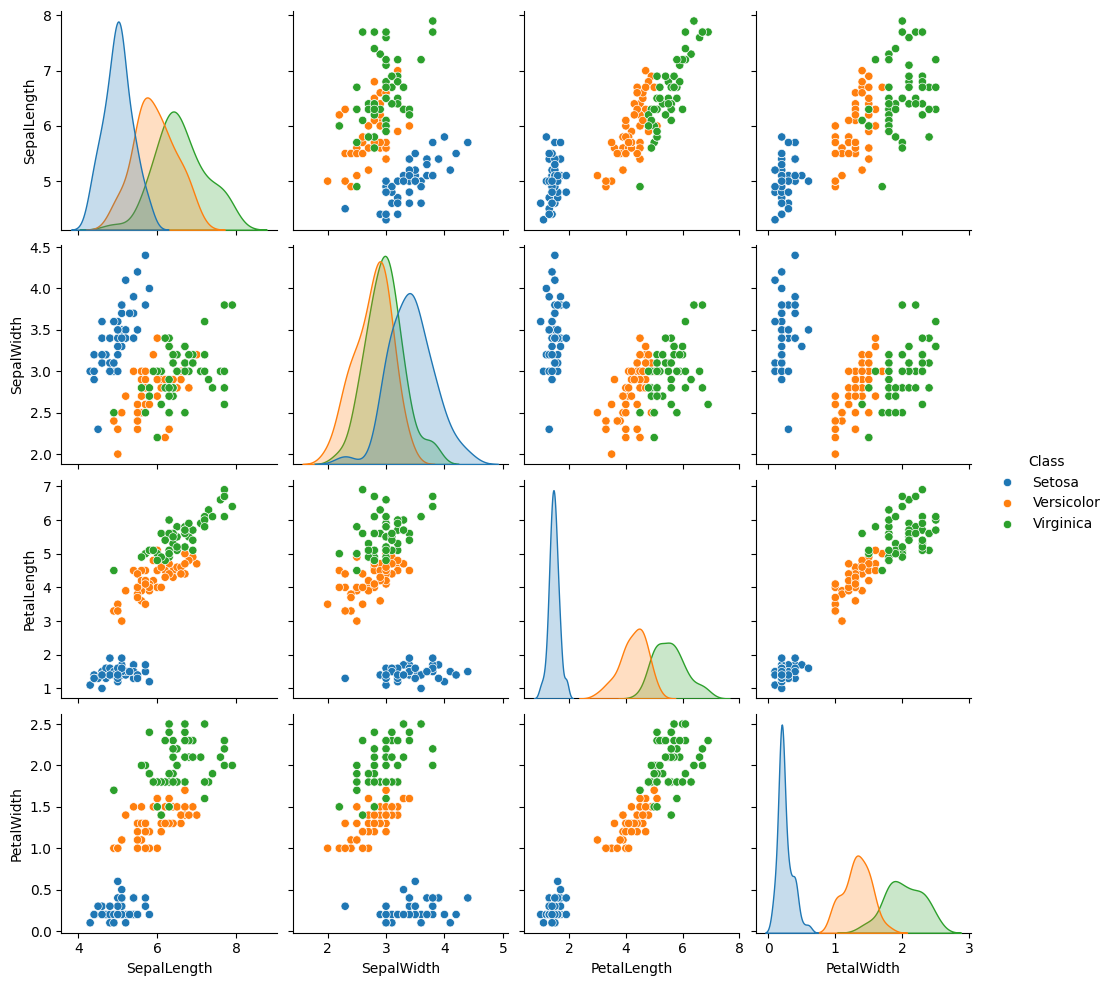

In [18]:
sns.pairplot(data=df, hue="Class")

In [25]:
df["target"] = 0
df["target"] = np.where(
    df.Class == "Setosa", 0,
    np.where(
        df.Class == "Versicolor", 1,
        np.where(
            df.Class == "Virginica", 2, "NAN"
        )
    )
)

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,target
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [26]:
df.drop("Class", axis=1, inplace=True)

In [27]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
#separar grupo de treino e teste
X = df.drop(["target"], axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=45)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
clf = GridSearchCV(dtree,
                   {'criterion': ["gini","entropy"],
                    'max_depth': [4,5,6,7,8,10],
                    'min_samples_split':[2,3,4],
                    'max_leaf_nodes': [3,4,5,6,7,8]})
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(criterion='gini', max_depth=6,
                           min_samples_split=2, max_leaf_nodes=5),
    n_estimators=100,
    learning_rate=0.2
)

In [ ]:
bdt.fit(x_train,y_train)

In [ ]:
y_pred=bdt.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print("Relatório de Classificação \n",
      classification_report(y_pred,y_test))

In [ ]:
conf = confusion_matrix(y_test, y_pred)
label = ["Setosa","Versicolor","Virginica"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()